# <u>Lending Club Case Study</u>

### <u>Introduction</u>
### <u>Goal</u>

How data can be used minimize the risk of losing money while lending to customers.

### <u>Risk associated with the problem</u>
-  If the applicant is <b>likely</b> to repay the loan, then not approving loan is a loss of business to the company (rejecting loans for non - default).
-  If the applicant is <b>not likely to repay the loan</b>, then approving loan may lead to financial loss to the company (approving loans for default).

The given dataset contains information about past loans applicants and whether they ‘defaulted’ or not. <br/>
Each row represents the loan details of the applicants.

### <u>Objective:</u>

-  The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. With the help of this case study, company can utilise this knowledge for its portfolio and risk assessment.

##### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('muted')
import warnings
warnings.filterwarnings("ignore")

In [2]:
# set the max columns to none to see all the columns & rows in dataset

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

##### Importing the dataset

In [3]:
loan_original = pd.read_csv("loan.csv")
loan_original.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Making a copy of dataset for EDA

In [4]:
loan_copy = loan_original.copy()
loan_copy.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Cheking shape and null columns in data

In [5]:
#Checking number of rows and columns in dataset
loan_copy.shape

(39717, 111)

In [6]:
#Checking the datatypes
loan_copy.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [7]:
#Describing the loans data

loan_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.0,516221.0,665665.0,837755.0,1077501.0
member_id,39717.0,850463.559408,265678.307421,70699.0,666780.0,850812.0,1047339.0,1314167.0
loan_amnt,39717.0,11219.443815,7456.670694,500.0,5500.0,10000.0,15000.0,35000.0
funded_amnt,39717.0,10947.713196,7187.238670,500.0,5400.0,9600.0,15000.0,35000.0
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.0,5000.0,8975.0,14400.0,35000.0
...,...,...,...,...,...,...,...,...
tax_liens,39678.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
tot_hi_cred_lim,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bal_ex_mort,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bc_limit,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Checking null columns in dataset

loan_copy.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
# Checking column with large amount of null values(in percentage) and irrelevant columns
(loan_copy.isnull().sum()/loan_copy.shape[0]*100).round(2).sort_values(ascending=False)

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

In [10]:
# As we see there are many columns with more than 60% of the columns values as null. 
# A lot of columns have more than 90% null values  
# First step would be to drop all these columns with more than 60% null values

loan_dropNA = loan_copy.dropna(thresh=loan_copy.shape[0]*0.6,how='all',axis=1)
loan_dropNA.shape
#loan.shape

(39717, 54)

In [11]:
(loan_dropNA.isnull().sum()/loan_dropNA.shape[0]*100).round(2).sort_values(ascending=False)

desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
total_rec_prncp                0.00
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_acc                      0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
collection_recovery_fee        0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
pub_rec                        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq                 0.00
delinq_amnt                 

In [12]:
# A total of 57 columns were dropped as these columns were having only null values and hence were of no use in analysis

loan_dropNA.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [13]:
#Checking number of unique values in each column
#This will help in narrowing down the number of columns for our analysis
 
print("No.of.unique values in each column :\n")
loan_dropNA.nunique(axis=0)

No.of.unique values in each column :



id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [14]:
# Removing colums with more than 50% of the values as unique values 
# as they have no significance in analysis and are treated as random variables.
cols_to_drop = ['id','member_id','url','total_pymnt','total_pymnt_inv','total_rec_int','last_pymnt_amnt','emp_title','desc','revol_bal','title']
loan_dropUniquieCol = loan_dropNA.drop(cols_to_drop, axis=1)
loan_dropUniquieCol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [15]:
# Removing "zip_code" as it is a masked data and hence cannot be used for analysis
loan_dropCol = loan_dropUniquieCol.drop(['zip_code'], axis=1)

In [16]:
# Removing columns which will not contribute to analysis - application_type
#funded_amt is not needed as we have funded_amt_inv
loan_dropCol = loan_dropCol.drop(['application_type','funded_amnt'], axis=1)

In [17]:
#Columns that represent post loan approval features
cols_post_approvals = ['delinq_2yrs','out_prncp','total_rec_prncp','total_rec_late_fee','recoveries','collection_recovery_fee',
                       'last_pymnt_d','chargeoff_within_12_mths','pymnt_plan','initial_list_status', 'out_prncp_inv','last_credit_pull_d', 
                       'collections_12_mths_ex_med', 'policy_code','acc_now_delinq', 'delinq_amnt','tax_liens']

In [18]:
loan_postdropCol = loan_dropCol.drop(cols_post_approvals, axis=1)

In [19]:
loan_postdropCol.shape

(39717, 23)

In [20]:
loan_postdropCol.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

### <u> Case Study Objective </u>

<i>Objective is to see who is likely to default the loan and this can only be said in case of either <b>"Fully Paid"</b> or <b>"Charged Off"</b> loans</i>

-  To exclude Current loan data, filter the dataframe by discarding loan_status not equal to <b>"Current"</b> 

In [21]:
print(loan_postdropCol['loan_status'].unique())
loan_data = loan_postdropCol[loan_postdropCol["loan_status"] != "Current"]
print(loan_data['loan_status'].unique())

['Fully Paid' 'Charged Off' 'Current']
['Fully Paid' 'Charged Off']


### Checking for Missing values

In [22]:
#Percentage of missing values
loan_data.isna().sum().sort_values(ascending=False)

emp_length              1033
pub_rec_bankruptcies     697
revol_util                50
loan_status                0
total_acc                  0
pub_rec                    0
open_acc                   0
inq_last_6mths             0
earliest_cr_line           0
dti                        0
addr_state                 0
purpose                    0
loan_amnt                  0
funded_amnt_inv            0
verification_status        0
annual_inc                 0
home_ownership             0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
issue_d                    0
dtype: int64

### Handling missing values

In [23]:
# Columns with missing values are: emp_length, pub_rec_bankruptcies, revol_util

#### emp_length

In [24]:
loan_data['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [25]:
loan_data['emp_length'].describe()

count         37544
unique           11
top       10+ years
freq           8488
Name: emp_length, dtype: object

In [26]:
# Mode of emp_length is 10 -- most frequent value
# The % of missing values in emp_length is very small, imputing it with most frequent value will not impact the analysis

loan_data['emp_length'].fillna(loan_data['emp_length'].mode()[0], inplace = True)

print("Number of null values: ", loan_data['emp_length'].isna().sum())
loan_data['emp_length'].value_counts()

Number of null values:  0


10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

#### revol_util

In [27]:
loan_data['revol_util'].isna().sum()

50

In [28]:
# The % of missing values in revol_util is very very small, hence the null values as removing null values won't impact analysis

loan_data.dropna(subset=['revol_util'],inplace=True)

In [29]:
loan_data['revol_util'].isna().sum()

0

#### pub_rec_bankruptcies

In [30]:
loan_data['pub_rec_bankruptcies'].value_counts()

0.0    36189
1.0     1636
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [31]:
#Most of the values for pub_rec_bankruptcies are 0 - hence filling the null values with 0
loan_data['pub_rec_bankruptcies'].fillna(0,inplace=True)

In [32]:
loan_data['pub_rec_bankruptcies'].isna().sum()

0

#### Correcting Data Types

In [33]:
loan_data.head(10)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,credit_card,AZ,27.65,Jan-85,1,3,0,83.70%,9,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,car,GA,1.00,Apr-99,5,3,0,9.40%,4,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,small_business,IL,8.72,Nov-01,2,2,0,98.50%,10,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,other,CA,20.00,Feb-96,1,10,0,21%,37,0.0
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,wedding,AZ,11.20,Nov-04,3,9,0,28.30%,12,0.0
6,7000,7000.0,60 months,15.96%,170.08,C,C5,8 years,RENT,47004.0,...,debt_consolidation,NC,23.51,Jul-05,1,7,0,85.60%,11,0.0
7,3000,3000.0,36 months,18.64%,109.43,E,E1,9 years,RENT,48000.0,...,car,CA,5.35,Jan-07,2,4,0,87.50%,4,0.0
8,5600,5600.0,60 months,21.28%,152.39,F,F2,4 years,OWN,40000.0,...,small_business,CA,5.55,Apr-04,2,11,0,32.60%,13,0.0
9,5375,5350.0,60 months,12.69%,121.45,B,B5,< 1 year,RENT,15000.0,...,other,TX,18.08,Sep-04,0,2,0,36.50%,3,0.0
10,6500,6500.0,60 months,14.65%,153.45,C,C3,5 years,OWN,72000.0,...,debt_consolidation,AZ,16.12,Jan-98,2,14,0,20.60%,23,0.0


In [34]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38527 non-null  int64  
 1   funded_amnt_inv       38527 non-null  float64
 2   term                  38527 non-null  object 
 3   int_rate              38527 non-null  object 
 4   installment           38527 non-null  float64
 5   grade                 38527 non-null  object 
 6   sub_grade             38527 non-null  object 
 7   emp_length            38527 non-null  object 
 8   home_ownership        38527 non-null  object 
 9   annual_inc            38527 non-null  float64
 10  verification_status   38527 non-null  object 
 11  issue_d               38527 non-null  object 
 12  loan_status           38527 non-null  object 
 13  purpose               38527 non-null  object 
 14  addr_state            38527 non-null  object 
 15  dti                

## <u>Correcting datatypes</u>

-  Column <b>int_rate</b> is marked as object datatype, though it is a numeric column, so we need to standardize data in this column
-  Column <b>revol_util</b> is marked as object datatype, though it is a numeric column, so we need to standardize data in this column
-  Column <b>emp_length</b> is marked as object datatype, thought it is a numeric column, so we need to standardize data in this column

In [35]:
# Column "term" has only two distinct values - 
# can continue to treat this column as object type as analysis on this column can be done without converting it
loan_data['term'].value_counts()

 36 months    29049
 60 months     9478
Name: term, dtype: int64

In [36]:
loan_data["int_rate"] = loan_data["int_rate"].apply(lambda x : pd.to_numeric(x.split('%')[0]))

In [37]:
loan_data["revol_util"] = loan_data["revol_util"].apply(lambda x : pd.to_numeric(x.split('%')[0]))

In [38]:
loan_data['emp_length'].value_counts()

10+ years    9517
< 1 year     4496
2 years      4286
3 years      4008
4 years      3335
5 years      3190
1 year       3163
6 years      2165
7 years      1708
8 years      1433
9 years      1226
Name: emp_length, dtype: int64

In [39]:
#Assuming emp_length "< 1 year" as 0.5 and "10+ years" as 10 - for analysis purpose 
loan_data["emp_length"] = loan_data["emp_length"].apply(lambda x: 0.5 if "<" in x else pd.to_numeric(x.split('+')[0] if "+" in x else x.split()[0]))

In [40]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65,162.87,B,B2,10.0,RENT,24000.0,...,credit_card,AZ,27.65,Jan-85,1,3,0,83.7,9,0.0
1,2500,2500.0,60 months,15.27,59.83,C,C4,0.5,RENT,30000.0,...,car,GA,1.00,Apr-99,5,3,0,9.4,4,0.0
2,2400,2400.0,36 months,15.96,84.33,C,C5,10.0,RENT,12252.0,...,small_business,IL,8.72,Nov-01,2,2,0,98.5,10,0.0
3,10000,10000.0,36 months,13.49,339.31,C,C1,10.0,RENT,49200.0,...,other,CA,20.00,Feb-96,1,10,0,21.0,37,0.0
5,5000,5000.0,36 months,7.90,156.46,A,A4,3.0,RENT,36000.0,...,wedding,AZ,11.20,Nov-04,3,9,0,28.3,12,0.0


In [41]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38527 non-null  int64  
 1   funded_amnt_inv       38527 non-null  float64
 2   term                  38527 non-null  object 
 3   int_rate              38527 non-null  float64
 4   installment           38527 non-null  float64
 5   grade                 38527 non-null  object 
 6   sub_grade             38527 non-null  object 
 7   emp_length            38527 non-null  float64
 8   home_ownership        38527 non-null  object 
 9   annual_inc            38527 non-null  float64
 10  verification_status   38527 non-null  object 
 11  issue_d               38527 non-null  object 
 12  loan_status           38527 non-null  object 
 13  purpose               38527 non-null  object 
 14  addr_state            38527 non-null  object 
 15  dti                

#### <u> Generating new columns from existing columns </u>

-  Generating two new columns for loan issue year and loan issue month from loan issue_d column
-  Extracting only numeric sub-grade value from sub_grade column as we already have a grade column in dataset

In [42]:
#loan_data["issue_d"]=pd.to_datetime(loan_data["issue_d"],format='%b-%y')
loan_data['issue_year']=pd.to_datetime(loan_data["issue_d"],format='%b-%y').dt.year
loan_data['issue_month']=pd.to_datetime(loan_data["issue_d"],format='%b-%y').dt.month

loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month
0,5000,4975.0,36 months,10.65,162.87,B,B2,10.0,RENT,24000.0,...,27.65,Jan-85,1,3,0,83.7,9,0.0,2011,12
1,2500,2500.0,60 months,15.27,59.83,C,C4,0.5,RENT,30000.0,...,1.00,Apr-99,5,3,0,9.4,4,0.0,2011,12
2,2400,2400.0,36 months,15.96,84.33,C,C5,10.0,RENT,12252.0,...,8.72,Nov-01,2,2,0,98.5,10,0.0,2011,12
3,10000,10000.0,36 months,13.49,339.31,C,C1,10.0,RENT,49200.0,...,20.00,Feb-96,1,10,0,21.0,37,0.0,2011,12
5,5000,5000.0,36 months,7.90,156.46,A,A4,3.0,RENT,36000.0,...,11.20,Nov-04,3,9,0,28.3,12,0.0,2011,12


In [43]:
#sub_grade

loan_data['sub_grade'].unique()

#We have a separate grade column, hence extracting only numeric sub_grade value from the data
loan_data['sub_grade_n'] = loan_data['sub_grade'].apply(lambda x: pd.to_numeric(x[-1]))
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month,sub_grade_n
0,5000,4975.0,36 months,10.65,162.87,B,B2,10.0,RENT,24000.0,...,Jan-85,1,3,0,83.7,9,0.0,2011,12,2
1,2500,2500.0,60 months,15.27,59.83,C,C4,0.5,RENT,30000.0,...,Apr-99,5,3,0,9.4,4,0.0,2011,12,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10.0,RENT,12252.0,...,Nov-01,2,2,0,98.5,10,0.0,2011,12,5
3,10000,10000.0,36 months,13.49,339.31,C,C1,10.0,RENT,49200.0,...,Feb-96,1,10,0,21.0,37,0.0,2011,12,1
5,5000,5000.0,36 months,7.90,156.46,A,A4,3.0,RENT,36000.0,...,Nov-04,3,9,0,28.3,12,0.0,2011,12,4


In [44]:
loan_data['loan_status'].value_counts()

Fully Paid     32916
Charged Off     5611
Name: loan_status, dtype: int64

#### <u>Checking for Outliers and removing them,  if required</u>

-  We will check for the outliers using box plots for continous variables:
-  Continuous variables which we are checking for outliers are:
    -  loan_amnt
    -  funded_amnt_inv
    -  int_rate
    -  annual_inc
    -  dti

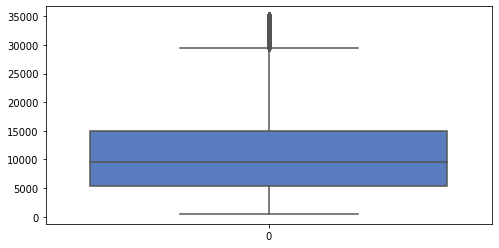

In [45]:
# loan_amnt
plt.figure(figsize=(8,4))
sns.boxplot(loan_data['loan_amnt'])

plt.show()

In [46]:
x = loan_data["loan_amnt"]

Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)


print("Lower Fence: ", min(x[x>Lower_Fence]))
print("Upper Fence: ", max(x[x<Upper_Fence]))
print("Max value of loan_amnt: ", max(x))

Lower Fence:  500
Upper Fence:  29500
Max value of loan_amnt:  35000


For Loan Amount (<b>loan_amnt</b>):- Upper Fence = <b>29500</b> and max value for loan_amnt is <b>35000</b>, which is not a lot more than upper fence, thus it shoud not have any impact on the analysis. 


<b><i> Hence there is no need to remove any Outliers from Loan Amount column</i></b>


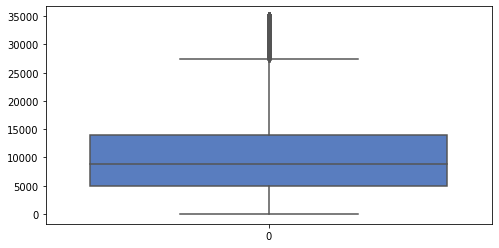

In [47]:
# funded_amnt_inv
plt.figure(figsize=(8,4))
sns.boxplot(loan_data['funded_amnt_inv'])
plt.show()

In [48]:
x = loan_data["funded_amnt_inv"]

Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)


print("Lower Fence: ", min(x[x>Lower_Fence]))
print("Upper Fence: ", max(x[x<Upper_Fence]))
print("Max value of funded_amnt_inv: ", max(x))

Lower Fence:  0.0
Upper Fence:  27489.08973
Max value of funded_amnt_inv:  35000.0


For Funded Loan Amount (<b>funded_amnt_inv</b>):- Upper Fence ~ <b>27500</b> and max value for Funded Loan Amount is <b>35000</b>, which is not a lot more than upper fence, thus it shoud not have any impact on the analysis. 

<b><i> Hence there is no need to remove any Outliers from Funded Loan Amount column</i></b>


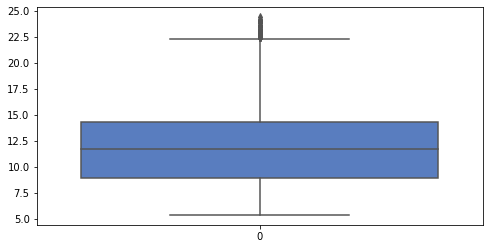

In [49]:
#int_rate

plt.figure(figsize=(8,4))
sns.boxplot(loan_data['int_rate'])

plt.show()

In [50]:
x = loan_data["int_rate"]

Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)


print("Lower Fence: ", min(x[x>Lower_Fence]))
print("Upper Fence: ", max(x[x<Upper_Fence]))
print("Max value of int_rate: ", max(x))

Lower Fence:  5.42
Upper Fence:  22.35
Max value of int_rate:  24.4


For Interest Rate (<b>int_rate</b>):- Upper Fence = <b>22.35</b> and max value for interest rate = <b>24.4</b>, which is not a lot more than upper fence, thus it shoud not have any impact on the analysis. 

<b><i> Hence there is no need to remove any Outliers from Interest Rate column</i></b>


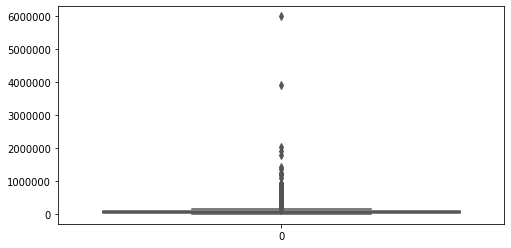

In [51]:
# Annual Income
plt.figure(figsize=(8,4))
sns.boxplot(loan_data['annual_inc'])
plt.show()

#### Clearly, the box plot is indicating Outliers

Check the quantile info for the annual inc column to check the how the general distribution varies for the column  

In [52]:
x = loan_data["annual_inc"]

Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)


print("Lower Fence: ", min(x[x>Lower_Fence]))
print("Upper Fence: ", max(x[x<Upper_Fence]))


print("Value of 70th quantile: ", x.quantile(0.70))
print("Value of 80th quantile: ", x.quantile(0.80))
print("Value of 85th quantile: ", x.quantile(0.85))
print("Value of 90th quantile: ", x.quantile(0.90))
print("Value of 95th quantile: ", x.quantile(0.95))
print("Value of 96th quantile: ", x.quantile(0.96))
print("Value of 97th quantile: ", x.quantile(0.97))
print("Value of 98th quantile: ", x.quantile(0.98))
print("Value of 99th quantile: ", x.quantile(0.99))

print("Max value of annual_inc: ", max(x))


Lower Fence:  4000.0
Upper Fence:  144997.0
Value of 70th quantile:  75000.0
Value of 80th quantile:  90000.0
Value of 85th quantile:  100000.0
Value of 90th quantile:  115000.0
Value of 95th quantile:  140004.0
Value of 96th quantile:  150000.0
Value of 97th quantile:  165000.0
Value of 98th quantile:  187000.0
Value of 99th quantile:  234000.0
Max value of annual_inc:  6000000.0


-  The values after 95th quantile seems to be varying from the general disrtibution and also there is a increase in values for small quantile variation, so consideing threshold of 95th quantile to remove the outliers

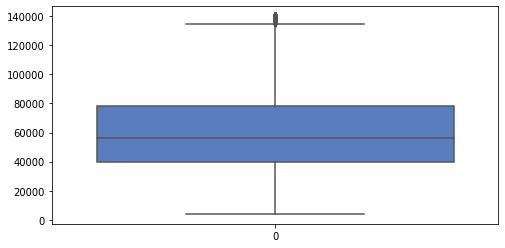

In [53]:
annual_inc_95_quan = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data['annual_inc'] <= annual_inc_95_quan]

#plotting boxplot after removing outliers for annual_inc
plt.figure(figsize=(8,4))
sns.boxplot(loan_data['annual_inc'])
plt.show()

-  Now, after removing the outlier values for <b>annual_inc</b>, the data values looks good. 

Proceeding with next identified column

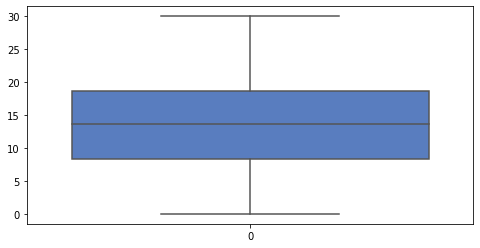

In [54]:
#dti

plt.figure(figsize=(8,4))
sns.boxplot(loan_data['dti'])
plt.show()

In [55]:
x = loan_data["dti"]

Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)


print("Lower Fence: ", min(x[x>Lower_Fence]))
print("Upper Fence: ", max(x[x<Upper_Fence]))
print("Max value of int_rate: ", max(x))

Lower Fence:  0.0
Upper Fence:  29.99
Max value of int_rate:  29.99


or column (<b>dti</b>):- Upper Fence = <b>29.99</b> and max value is also <b>29.99</b>, hence concluding that there are no outliers for this column data. 

<b><i> Hence, no action required</i></b>

## Visualizing Categorical Variables - Univariate Analysis

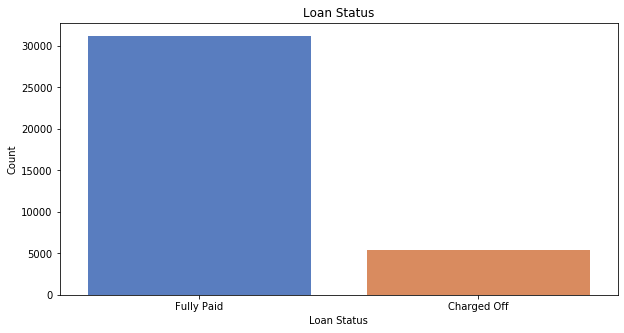

In [56]:
#loan_status

plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='loan_status')
plt.title('Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

<b>Observation: </b> Defaulted Loans (Charged Off) are low in number as compared to the Fully Paid loans.

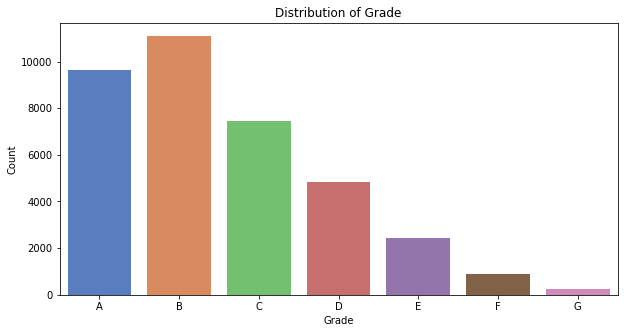

In [57]:
# Distribution of Grade
plt.figure(figsize=(10,5))
sns.countplot(data = loan_data, x='grade',order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Grade')
plt.show()

<b>Observation: </b> A large amount of loans are with category A & B as compared to other grades, 
    concluding that <i>most loans are high grade loans</i>

In [58]:
loan_data['sub_grade'].sort_values().unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

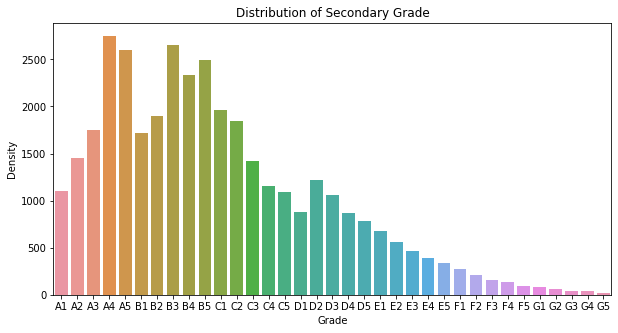

In [59]:
# Distribution of Secondary Grade
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data, x='sub_grade', order=['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'])
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Secondary Grade')
plt.show()

<b>Observation: </b> A large amount of loans are with lower sub_grades in loan grade A & B showing most loans are high grade loans, 
    concluding that sub grades are in sync with loan grade infering <i>most loans being high grade loans</i>

In [60]:
#Checking distribution for "Charged Off loans alone"

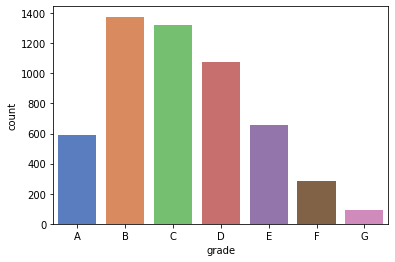

In [61]:
sns.countplot(x = 'grade', data = loan_data[loan_data['loan_status'] == 'Charged Off'], 
              order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

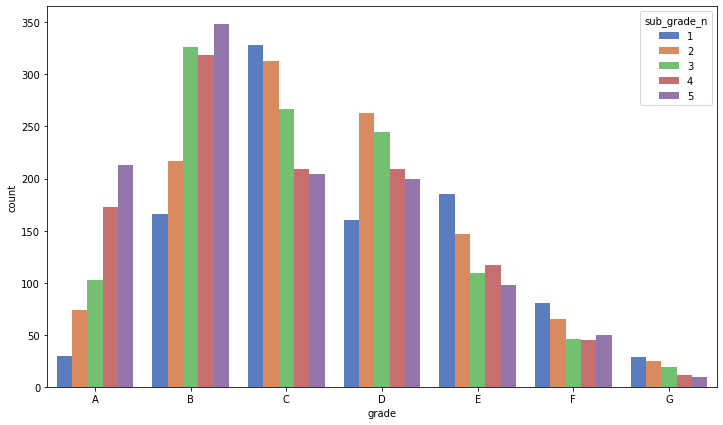

In [62]:
plt.figure(figsize=(12,7))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade_n',
              data = loan_data[loan_data['loan_status'] == 'Charged Off'])
plt.show()


### Home Ownership

In [63]:
loan_data['home_ownership'].value_counts()

RENT        18000
MORTGAGE    15665
OWN          2847
OTHER          91
NONE            3
Name: home_ownership, dtype: int64

In [64]:
#Replacing "NONE" with "OTHER" - as "NONE" has only 3 counts
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)
loan_data['home_ownership'].value_counts()

RENT        18000
MORTGAGE    15665
OWN          2847
OTHER          94
Name: home_ownership, dtype: int64

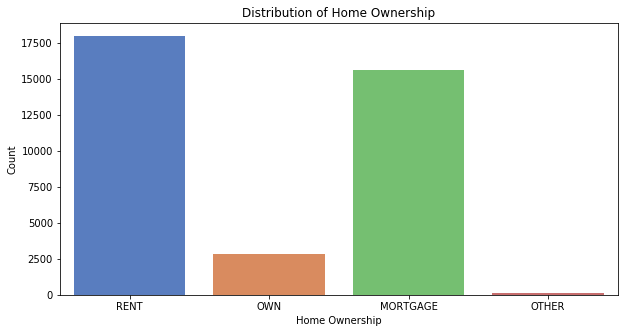

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data, x='home_ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership')
plt.show()

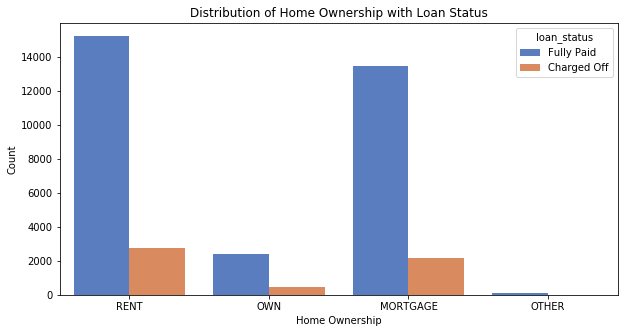

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data, x='home_ownership', hue='loan_status')
#sns.countplot(data = loan_data[loan_data['loan_status'] == 'Charged Off'], x='home_ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership with Loan Status')
plt.show()

<b>Observation: </b> 
-  Most of the borrowers does not possess any property and are on either "RENT" or "MORTGAGE"
-  The % of loan defaulters is more if the borrower is already having an ongoing "MORTGAGE"

### Employment Length

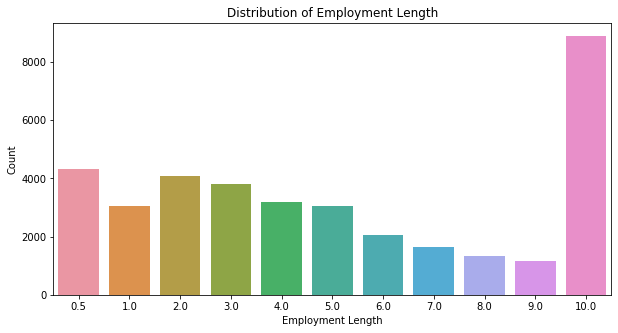

In [67]:
# emp_length
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data, x='emp_length')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length')
plt.show()

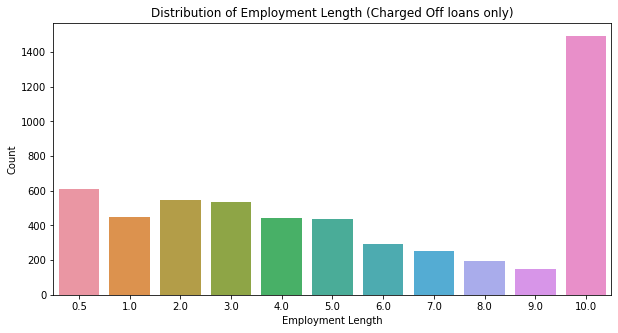

In [68]:
#emp_length for only "Charged Off loans"
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length (Charged Off loans only)')
plt.show()

<b>Observation: </b> 
-  Most of the borrowers are having experience of 10+ years
-  Most of the defaulters are having experience of 10+ years

### Verification Status for Income

In [69]:
loan_data['verification_status'].value_counts()

Not Verified       16253
Verified           11209
Source Verified     9144
Name: verification_status, dtype: int64

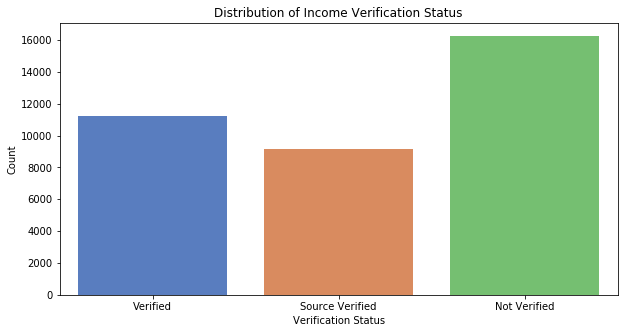

In [70]:
# verification_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data, x='verification_status')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Income Verification Status')
plt.show()

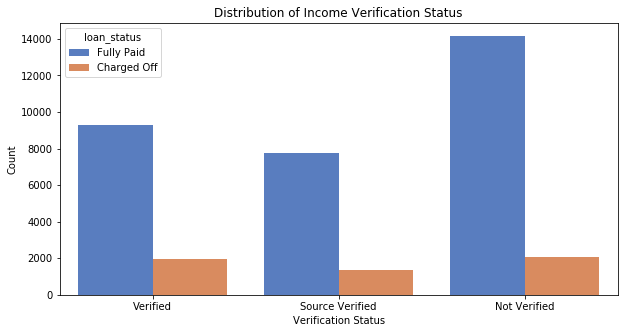

In [71]:
# verification_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data, x='verification_status', hue='loan_status')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Income Verification Status')
plt.show()

<b>Observation: </b> For Most of the borrowers (roughly 45%) the income status is not verified by LC

In [72]:
loan_data['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

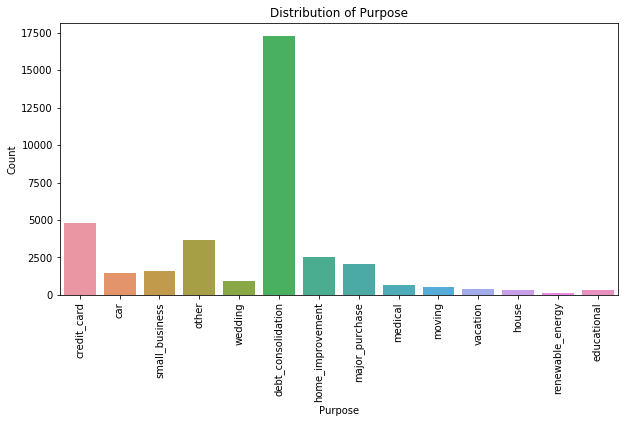

In [73]:
# verification_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data, x='purpose')
plt.xticks(rotation='vertical')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Distribution of Purpose')
plt.show()

<b>Observation: </b> Most of the borrowers have taken the loan for debt consolidation followed by credit card

### Address State

In [74]:
#addr_state
loan_data['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT', 'FL',
       'NY', 'PA', 'MN', 'NJ', 'OR', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'NV', 'AK', 'CO', 'MD', 'WV', 'VT', 'MI', 'DC',
       'SD', 'NH', 'AR', 'NM', 'KS', 'HI', 'OK', 'MT', 'WY', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

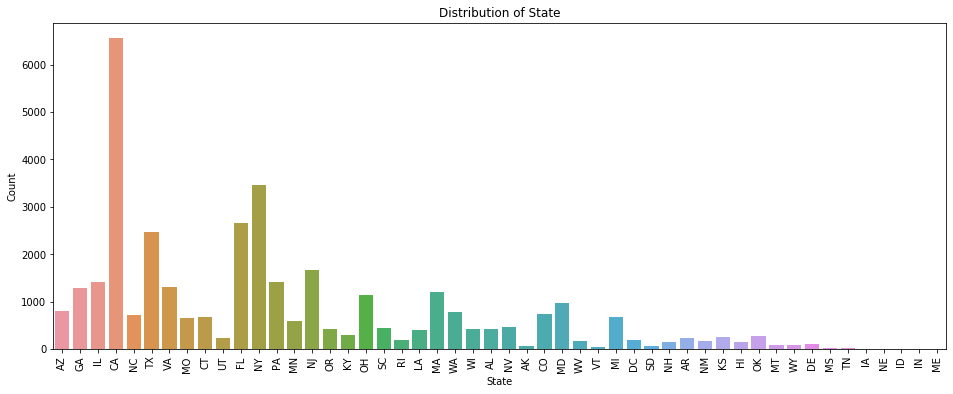

In [75]:
plt.figure(figsize=(16,6))
sns.countplot(data=loan_data,x='addr_state')
plt.xticks(rotation='vertical')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of State')
plt.show()

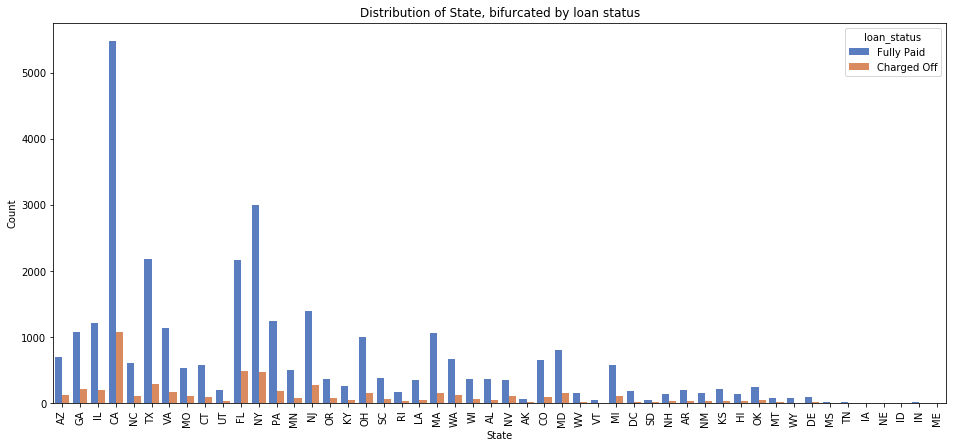

In [76]:
plt.figure(figsize=(16,7))
sns.countplot(data=loan_data,x='addr_state',hue='loan_status')
plt.xticks(rotation='vertical')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of State, bifurcated by loan status')
plt.show()

<b>Observation: </b> Looking at the distribution of loans along with states, we can conclude that majority of the borrowers are from big urban states like California, NewYork, Florida, Texas.

### Number of Public Record Bankruptcies

In [77]:
loan_data['pub_rec_bankruptcies'].value_counts()

0.0    35003
1.0     1598
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

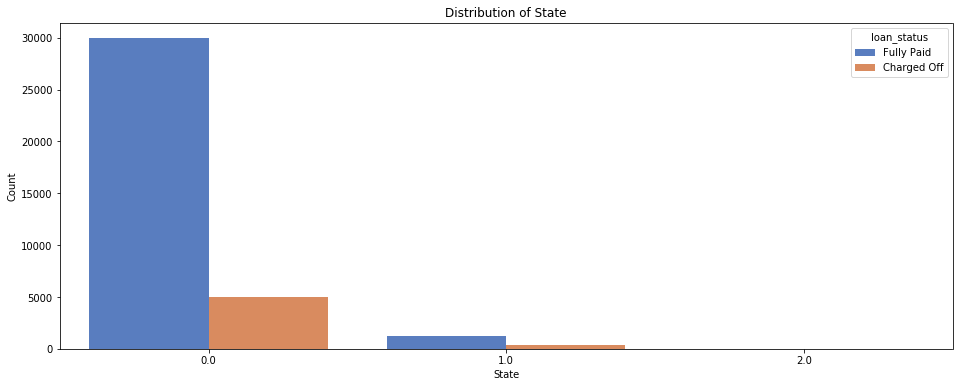

In [78]:
plt.figure(figsize=(16,6))
sns.countplot(data=loan_data, x='pub_rec_bankruptcies',hue='loan_status')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of State')
plt.show()

<b>Observation: </b> Looking at the numbers, we can most certainly say that the for majority of the borrowers, the public record for bankruptcies is "zero"

### Term

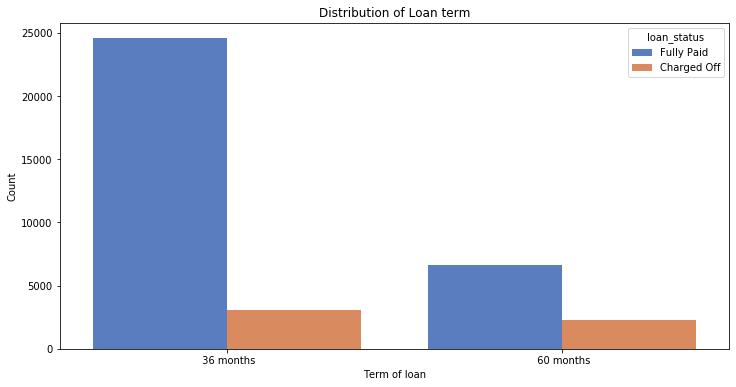

In [79]:
#term
plt.figure(figsize=(12,6))
sns.countplot(data=loan_data, x='term',hue='loan_status')
plt.xlabel('Term of loan')
plt.ylabel('Count')
plt.title('Distribution of Loan term')
plt.show()

<b>Observation: </b> Majority of the loans are approved for 36 months period

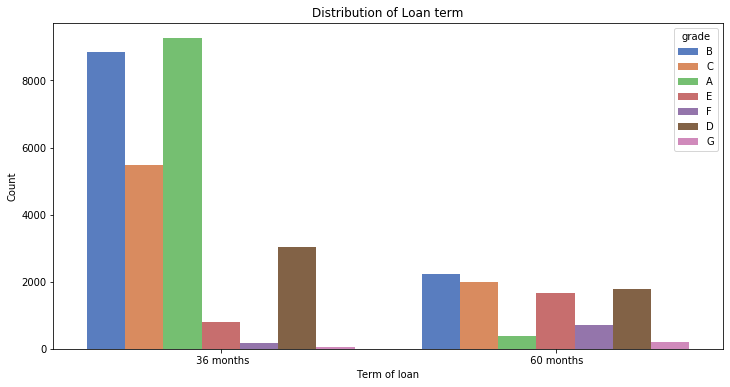

In [80]:
plt.figure(figsize=(12,6))
sns.countplot(data=loan_data, x='term', hue='grade')
plt.xlabel('Term of loan')
plt.ylabel('Count')
plt.title('Distribution of Loan term')
plt.show()

<b>Observation: </b> Majority of the loans in term of 36 months consist of grade A and B whereas majority of loans in 60 months tenure are of grade B & C

#### Inquiry in last 6 months

In [81]:
loan_data['inq_last_6mths'].value_counts()

0    17839
1    10122
2     5330
3     2792
4      291
5      134
6       56
7       32
8       10
Name: inq_last_6mths, dtype: int64

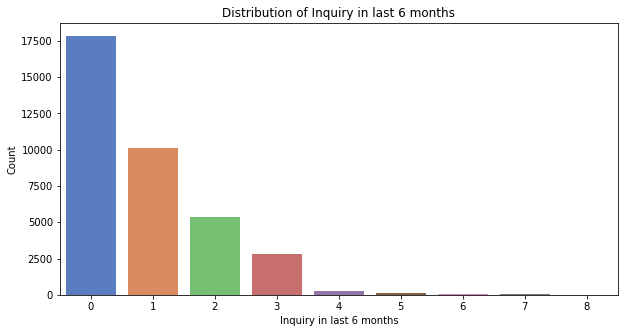

In [82]:
#inq_last_6mths

plt.figure(figsize=(10,5))
sns.countplot(data=loan_data, x='inq_last_6mths')
plt.xlabel('Inquiry in last 6 months')
plt.ylabel('Count')
plt.title('Distribution of Inquiry in last 6 months')
plt.show()

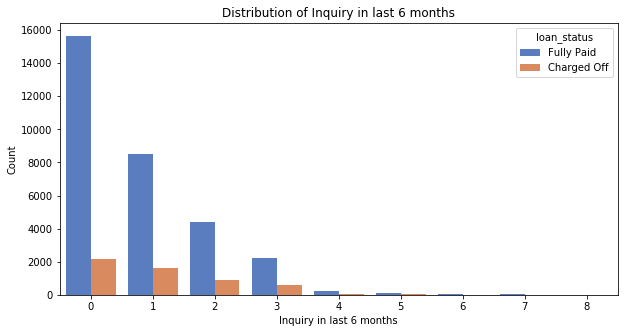

In [83]:
#inq_last_6mths

plt.figure(figsize=(10,5))
sns.countplot(data=loan_data, x='inq_last_6mths', hue='loan_status')
plt.xlabel('Inquiry in last 6 months')
plt.ylabel('Count')
plt.title('Distribution of Inquiry in last 6 months')
plt.show()

### Annual Income

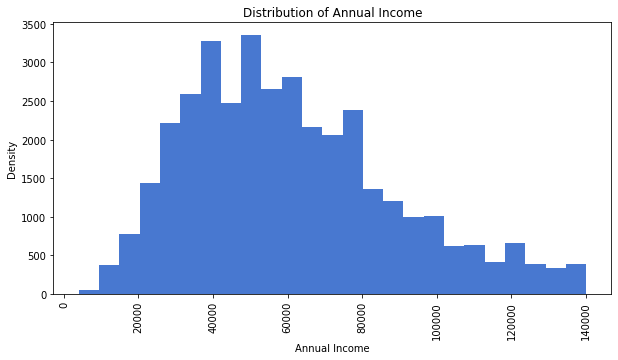

In [84]:
# Distribution of annual_inc

plt.figure(figsize=(10,5))
plt.hist(loan_data["annual_inc"],bins=25)
plt.xticks(rotation='vertical')
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.title('Distribution of Annual Income')
plt.show()

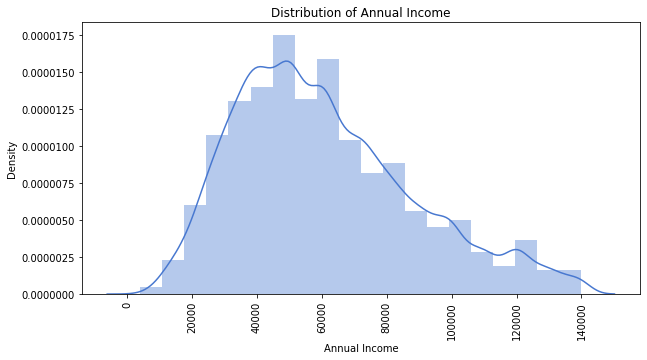

In [85]:
# Distribution of annual_inc
plt.figure(figsize=(10,5))
sns.distplot(loan_data["annual_inc"],kde=True,bins=20)
plt.xticks(rotation='vertical')
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.title('Distribution of Annual Income')
plt.show()

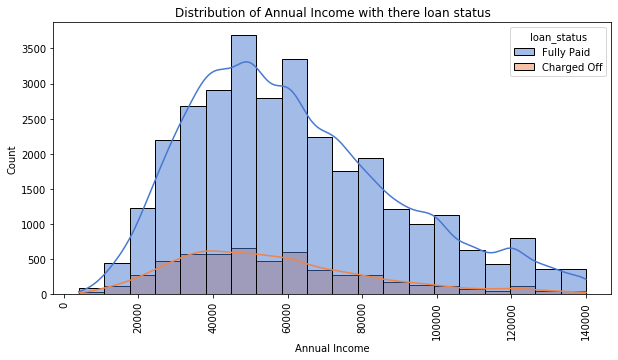

In [86]:
# Distribution of annual_inc
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data, x="annual_inc",hue='loan_status',kde=True,bins=20)
plt.xticks(rotation='vertical')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income with there loan status')
plt.show()

<b>Observation: </b> 
- The distribution for Annual Income looks like a normal distribution but it is left skewed. So we can say that most of the borrowers have low annual income.
- Borrowers with less than 50000 as the annual income are most likely to default the loan.

### dti: debt to income ratio

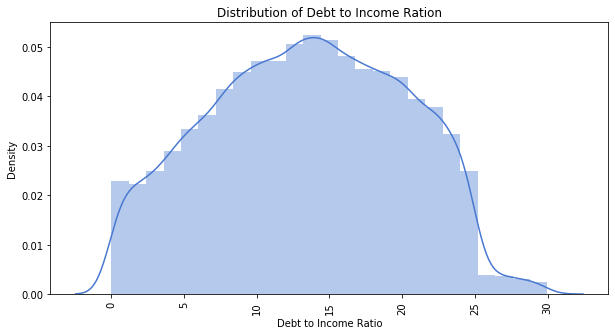

In [87]:
# dti

plt.figure(figsize=(10,5))
sns.distplot(loan_data['dti'],kde=True,bins=25)
plt.xticks(rotation='vertical')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Density')
plt.title('Distribution of Debt to Income Ration')
plt.show()

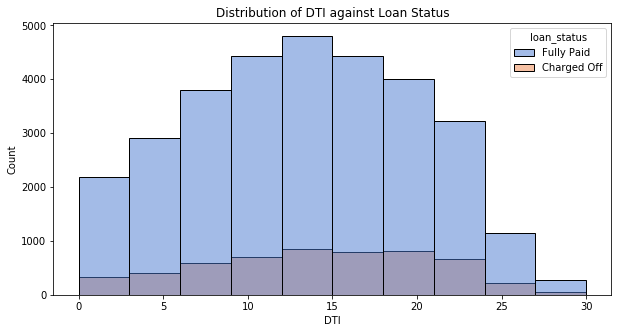

In [88]:
plt.figure(figsize=(10,5))
sns.histplot(x=loan_data['dti'],hue=loan_data['loan_status'],bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI against Loan Status')
plt.show()

<b>Observation: </b> Looking at the distribution we can conclude that for majority of the borrowers, the debt to income ratio is very high, majorly concentrated at the range of <b>10-20 dti ratio.</b>

### Analyzing dereved dates column from issue_d

#### Issue Month

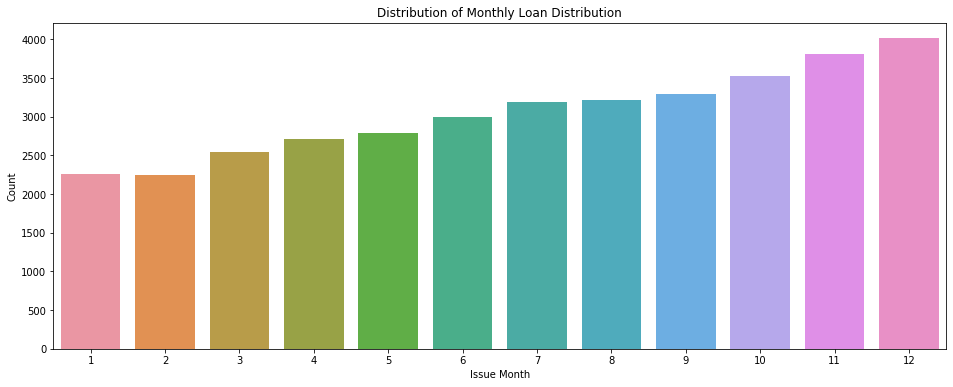

In [89]:
plt.figure(figsize=(16,6))
sns.countplot(data=loan_data, x='issue_month')
plt.xlabel('Issue Month')
plt.ylabel('Count')
plt.title('Distribution of Monthly Loan Distribution')
plt.show()

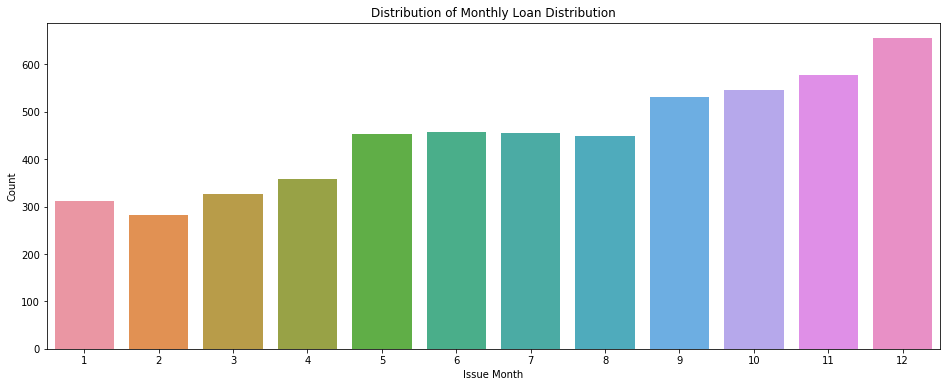

In [90]:
plt.figure(figsize=(16,6))
sns.countplot(x='issue_month',data=loan_data[loan_data['loan_status'] == 'Charged Off'])
plt.xlabel('Issue Month')
plt.ylabel('Count')
plt.title('Distribution of Monthly Loan Distribution')
plt.show()

<b>Observation: </b> 
-  Looking at the distribution we can conclude that majority of the loans are processed in the last quarter of the year
-  As the loans processed in last quarter of the year are more, the defaulters are also more from the last quarter of the year

#### Issue Year

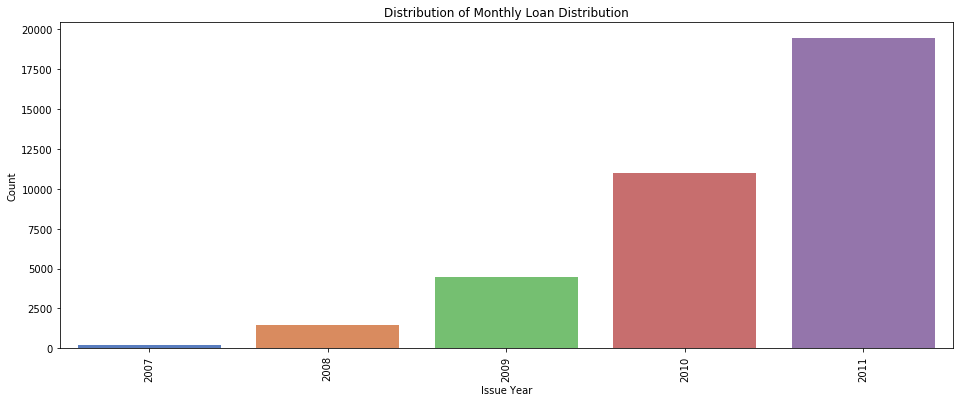

In [91]:
plt.figure(figsize=(16,6))
sns.countplot(data=loan_data,x='issue_year')
plt.xticks(rotation='vertical')
plt.xlabel('Issue Year')
plt.ylabel('Count')
plt.title('Distribution of Monthly Loan Distribution')
plt.show()

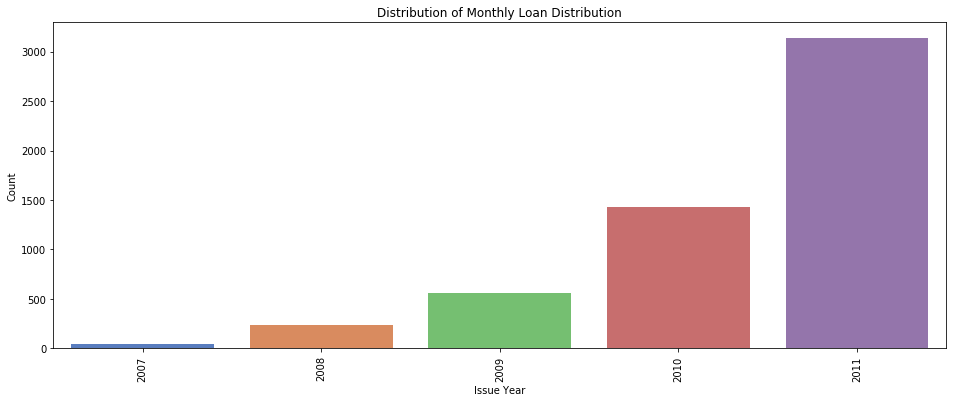

In [92]:
plt.figure(figsize=(16,6))
sns.countplot(x='issue_year',data=loan_data[loan_data['loan_status'] == 'Charged Off'])
plt.xticks(rotation='vertical')
plt.xlabel('Issue Year')
plt.ylabel('Count')
plt.title('Distribution of Monthly Loan Distribution')
plt.show()

<b>Observation: </b> 
-  Looking at the distribution we can conclude that the loan approval numbers increases positively year on year and the increase with time is exponential
-  With the increase in number of loans approvals, the loan defaulters have also increased positively year on year

### Creating bins for some columns to make them categorical and then do some univariate analysis

In [93]:
#creating bins for int_rate, open_acc, revol_util, total_acc
loan_data['int_rate_bins'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['open_acc_bins'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_data['revol_util_bins'] = pd.cut(loan_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_data['total_acc_bins'] = pd.cut(loan_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_data['loan_amnt_bins'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data['annual_inc_bins'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])                                        

In [94]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,pub_rec_bankruptcies,issue_year,issue_month,sub_grade_n,int_rate_bins,open_acc_bins,revol_util_bins,total_acc_bins,loan_amnt_bins,annual_inc_bins
0,5000,4975.0,36 months,10.65,162.87,B,B2,10.0,RENT,24000.0,...,0.0,2011,12,2,9%-13%,2-10,80-100,2-20,0-5k,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,C4,0.5,RENT,30000.0,...,0.0,2011,12,4,13%-17%,2-10,0-20,2-20,0-5k,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,C5,10.0,RENT,12252.0,...,0.0,2011,12,5,13%-17%,2-10,80-100,2-20,0-5k,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,C1,10.0,RENT,49200.0,...,0.0,2011,12,1,13%-17%,2-10,20-40,20-37,5k-10k,31k-58k
5,5000,5000.0,36 months,7.90,156.46,A,A4,3.0,RENT,36000.0,...,0.0,2011,12,4,5%-9%,2-10,20-40,2-20,0-5k,31k-58k


### Analyzing interest rate for the loans with respect to the interest rate bins created

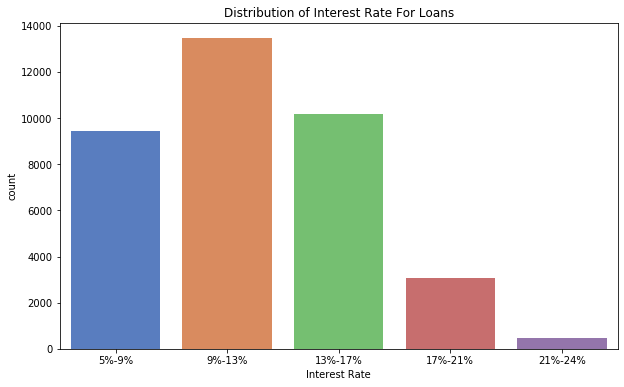

In [95]:
# int_rate_bins

plt.figure(figsize = (10,6))
sns.countplot(data=loan_data, x='int_rate_bins')
plt.xlabel('Interest Rate')
plt.title('Distribution of Interest Rate For Loans')
plt.show()

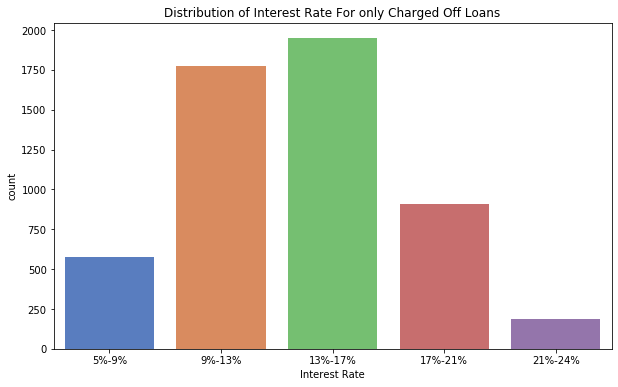

In [96]:
# int_rate_bins - for "Charged Off" loans only
plt.figure(figsize = (10,6))
sns.countplot(x='int_rate_bins', data=loan_data[loan_data['loan_status'] == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.title('Distribution of Interest Rate For only Charged Off Loans')
plt.show()

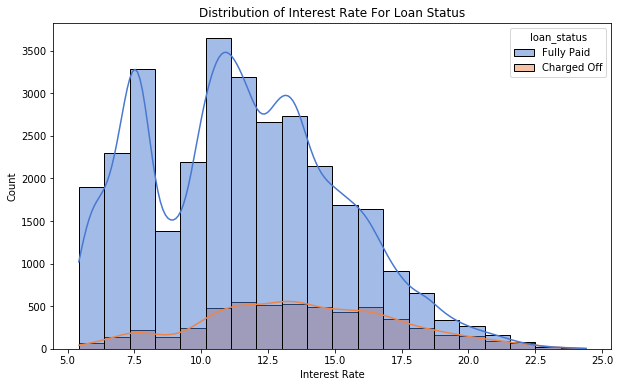

In [97]:
plt.figure(figsize=(10,6))
sns.histplot(data=loan_data,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status')
plt.show()

<b>Observation: </b> 
-  For the borrowers where the interest rate is between 13%-17% - the defaulters % is more as compared to borrowers with other interest rate percentage
-  The rate of defaulters decreases and continues to decrease if the interest rate is more than 17% 

### Analyzing open_acc for the loans with respect to open acc bins created

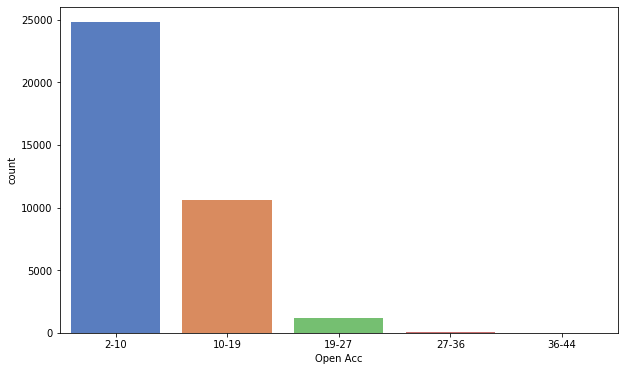

In [98]:
# open_acc_bins
plt.figure(figsize = (10,6))
sns.countplot(data=loan_data, x='open_acc_bins')
plt.xlabel("Open Acc")
plt.show()

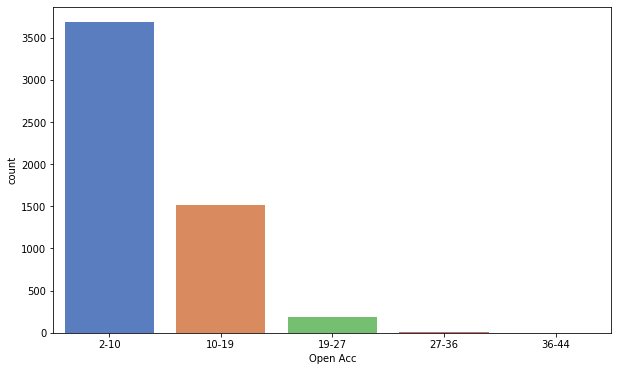

In [99]:
plt.figure(figsize = (10,6))
sns.countplot(x='open_acc_bins', data=loan_data[loan_data['loan_status'] == 'Charged Off'])
plt.xlabel("Open Acc")
plt.show()

### Analyzing revol_util for the loans with respect to revol_util bins created

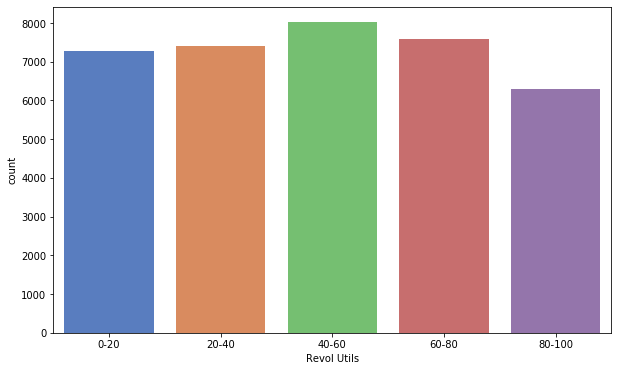

In [100]:
# revol_util_bins
plt.figure(figsize = (10,6))
sns.countplot(data=loan_data, x='revol_util_bins')
plt.xlabel("Revol Utils")
plt.show()

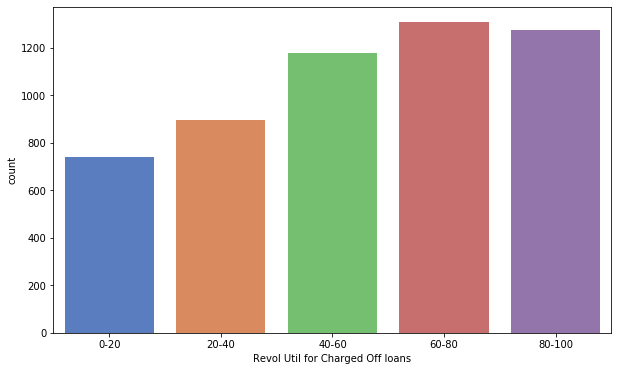

In [101]:
# revol_util_bins
plt.figure(figsize = (10,6))
sns.countplot(x='revol_util_bins', data=loan_data[loan_data["loan_status"] == "Charged Off"])
plt.xlabel("Revol Util for Charged Off loans")
plt.show()

### Analyzing total acc for the loans with respect to total acc bins created

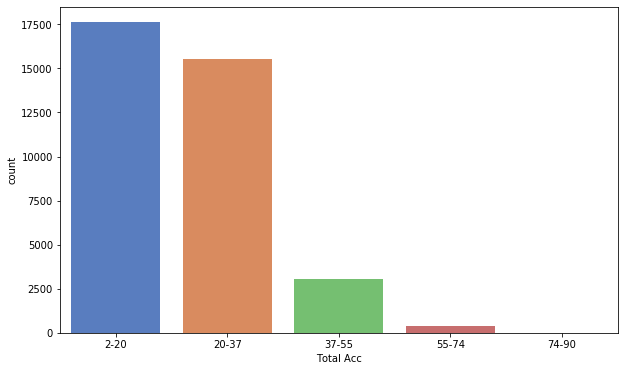

In [102]:
# total_acc_bins

plt.figure(figsize = (10,6))
sns.countplot(data=loan_data, x='total_acc_bins')
plt.xlabel("Total Acc")
plt.show()

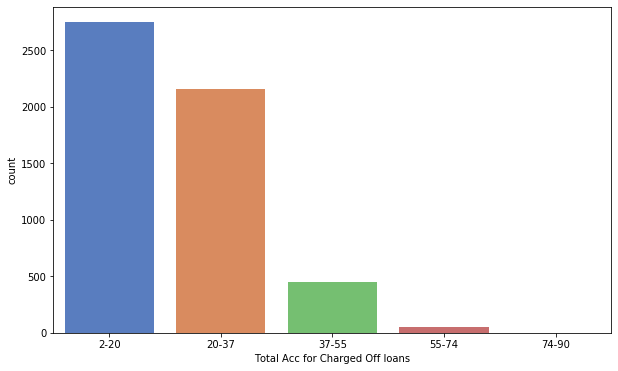

In [103]:
plt.figure(figsize = (10,6))
sns.countplot(x='total_acc_bins', data=loan_data[loan_data["loan_status"] == "Charged Off"])
plt.xlabel("Total Acc for Charged Off loans")
plt.show()

### Analyzing Annual Income for the loans with respect to Annual Income bins created

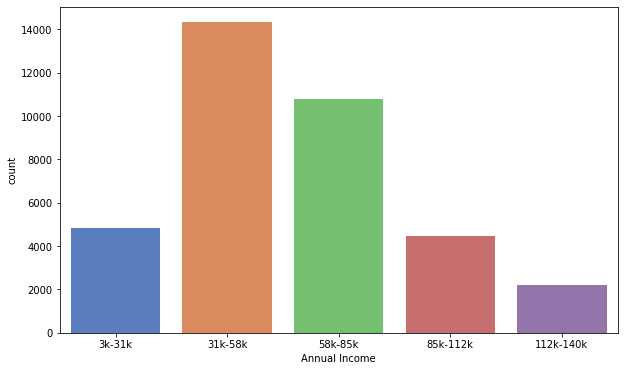

In [104]:
# annual_inc_bins
plt.figure(figsize = (10,6))
sns.countplot(data=loan_data, x='annual_inc_bins')
plt.xlabel("Annual Income")
plt.show()

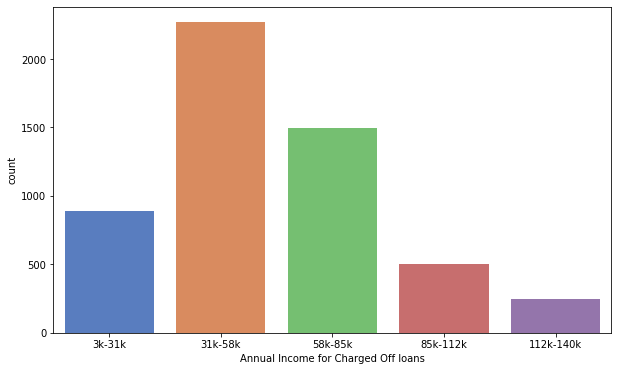

In [105]:
# annual_inc_bins
plt.figure(figsize = (10,6))
sns.countplot(x='annual_inc_bins', data=loan_data[loan_data["loan_status"] == "Charged Off"])
plt.xlabel("Annual Income for Charged Off loans")
plt.show()

### Analyzing Loan Amount column against loan status

In [106]:
loan_data.head(2)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,pub_rec_bankruptcies,issue_year,issue_month,sub_grade_n,int_rate_bins,open_acc_bins,revol_util_bins,total_acc_bins,loan_amnt_bins,annual_inc_bins
0,5000,4975.0,36 months,10.65,162.87,B,B2,10.0,RENT,24000.0,...,0.0,2011,12,2,9%-13%,2-10,80-100,2-20,0-5k,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,C4,0.5,RENT,30000.0,...,0.0,2011,12,4,13%-17%,2-10,0-20,2-20,0-5k,3k-31k


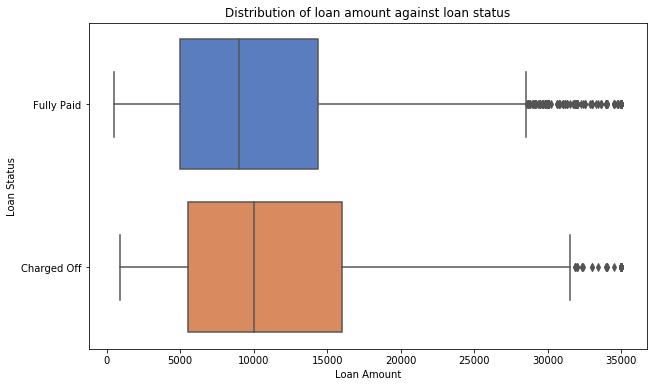

In [107]:
# Distribution of loan amount based on loan status

plt.figure(figsize=(10,6))
sns.boxplot(data=loan_data, x='loan_amnt', y='loan_status')
plt.xlabel("Loan Amount")
plt.ylabel("Loan Status")
plt.title("Distribution of loan amount against loan status")
plt.show()

<b>Observation: </b> 
-  The mean and 25th quantile is same for both Fully Paid and Charged Off loans
-  We see a larger 75% quantile in "Charged Off" loans - indicating larger the amount of loan, higher the chance of defaulting.

### Analyzing Annual Income column against loan purpose

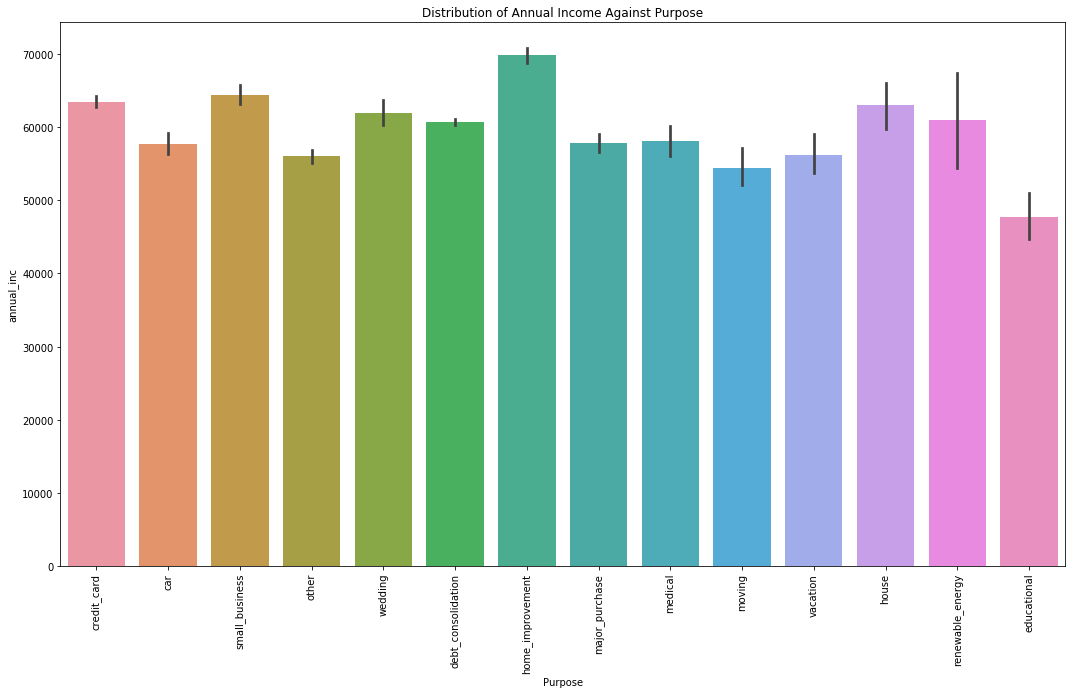

In [108]:
plt.figure(figsize=(18,10))
sns.barplot(data=loan_data,x='purpose',y='annual_inc')
plt.xticks(rotation='vertical')
plt.xlabel('Purpose')
plt.title('Distribution of Annual Income Against Purpose')
plt.show()

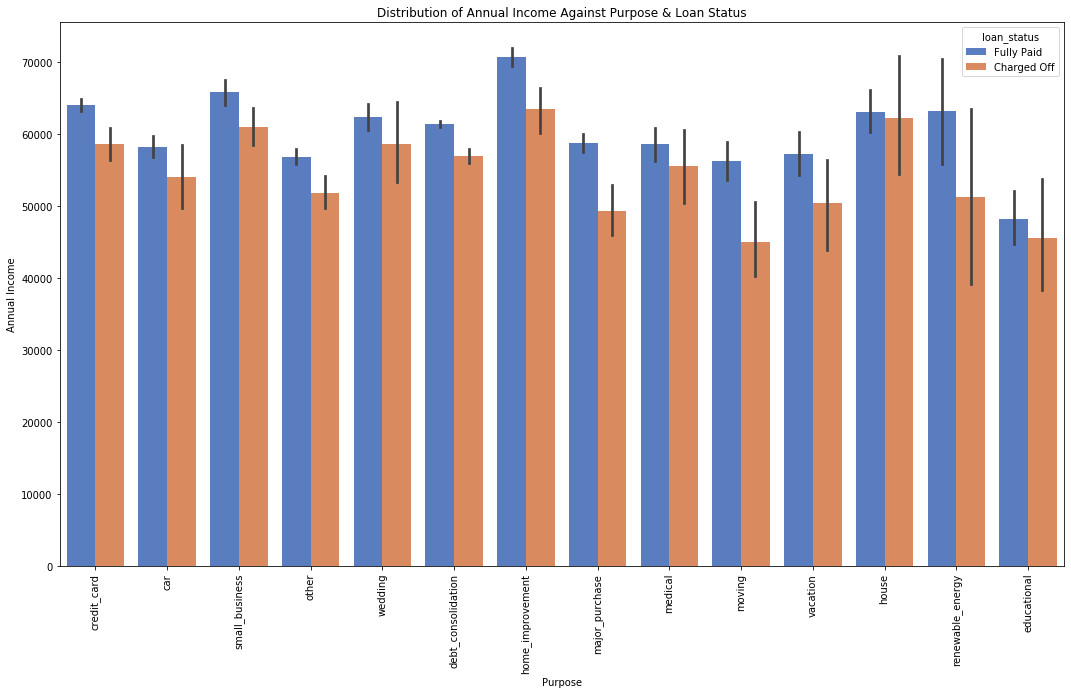

In [109]:
plt.figure(figsize=(18,10))
sns.barplot(data=loan_data,x='purpose',y='annual_inc', hue='loan_status')
plt.xticks(rotation='vertical')
plt.xlabel('Purpose')
plt.ylabel('Annual Income')
plt.title('Distribution of Annual Income Against Purpose & Loan Status')
plt.show()

<b>Observation: </b> 
- The individuals with higher salary mostly applied loans for home improvement, small business and against credit cards
- We also see the highest number of loan defaulters against the debt consolidation, small business, credit card and home improvement category

### Analyzing Annual Income column against home ownership

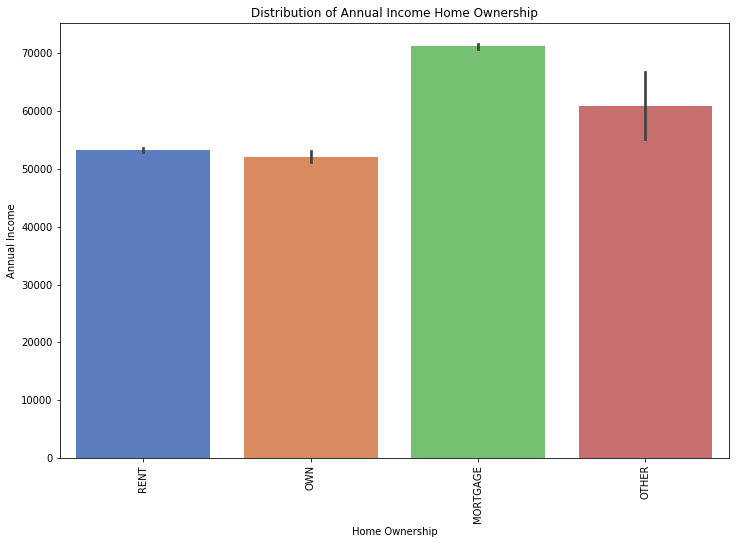

In [110]:
plt.figure(figsize=(12,8))
sns.barplot(data=loan_data,x='home_ownership',y='annual_inc')
plt.xticks(rotation='vertical')
plt.xlabel('Home Ownership')
plt.ylabel('Annual Income')
plt.title('Distribution of Annual Income Home Ownership')
plt.show()

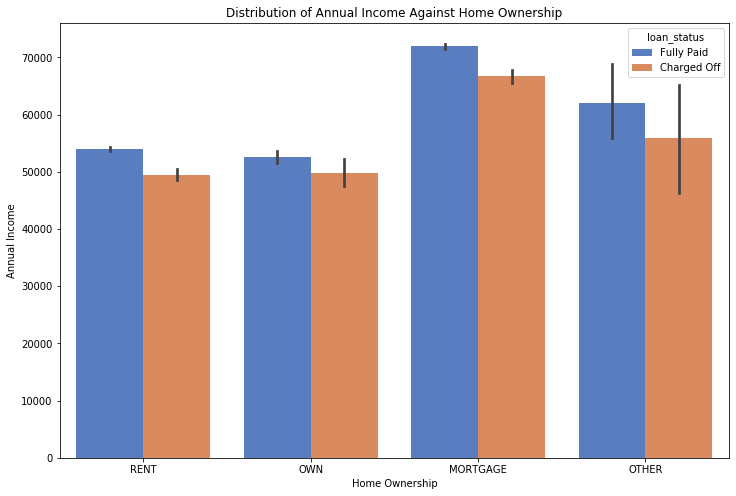

In [111]:
plt.figure(figsize=(12,8))
sns.barplot(data=loan_data,x='home_ownership',y='annual_inc', hue = 'loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Annual Income')
plt.title('Distribution of Annual Income Against Home Ownership')
plt.show()

### Analyzing Annual Income column against Loan Amount

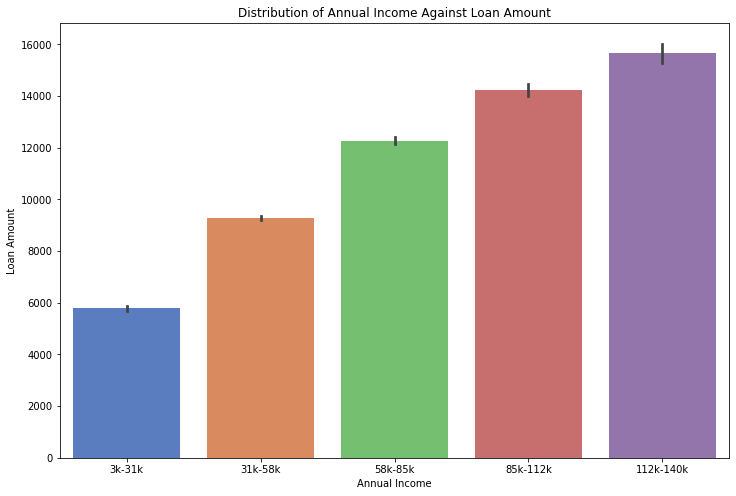

In [112]:
plt.figure(figsize=(12,8))
sns.barplot(data=loan_data,y='loan_amnt',x='annual_inc_bins')
plt.ylabel('Loan Amount')
plt.xlabel('Annual Income')
plt.title('Distribution of Annual Income Against Loan Amount')
plt.show()

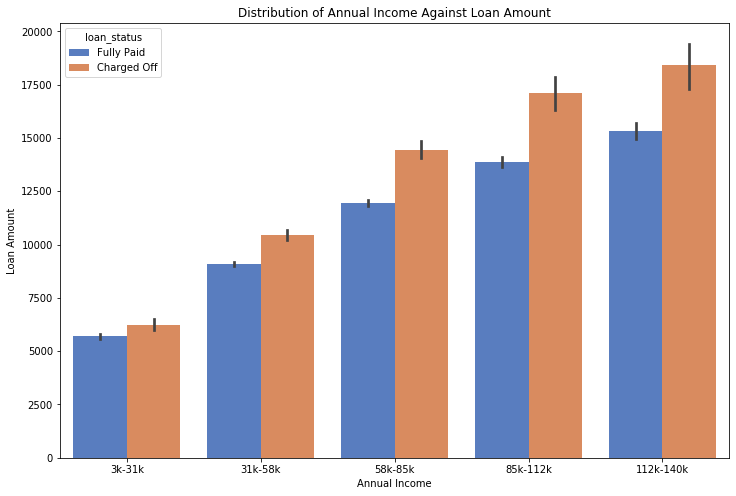

In [113]:
plt.figure(figsize=(12,8))
sns.barplot(data=loan_data,y='loan_amnt',x='annual_inc_bins', hue='loan_status')
plt.ylabel('Loan Amount')
plt.xlabel('Annual Income')
plt.title('Distribution of Annual Income Against Loan Amount')
plt.show()

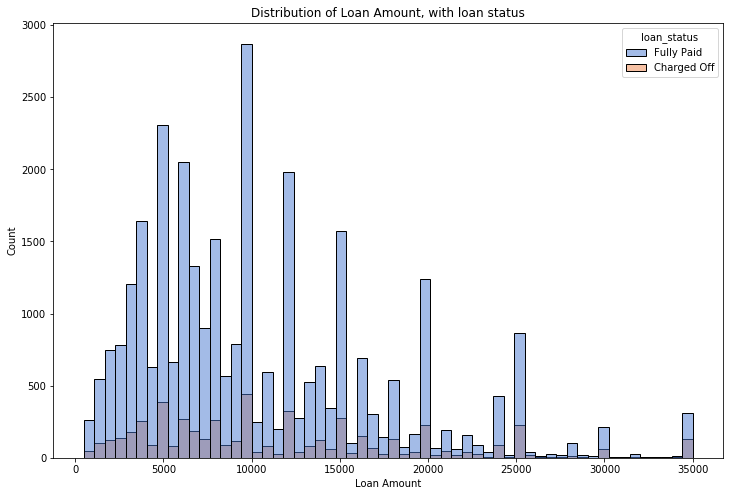

In [114]:
plt.figure(figsize=(12,8))
sns.histplot(data=loan_data,x='loan_amnt', hue='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount, with loan status')
plt.show()

### Analyzing Loan Amount column against Interest Rate

In [115]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'pub_rec_bankruptcies',
       'issue_year', 'issue_month', 'sub_grade_n', 'int_rate_bins',
       'open_acc_bins', 'revol_util_bins', 'total_acc_bins', 'loan_amnt_bins',
       'annual_inc_bins'],
      dtype='object')

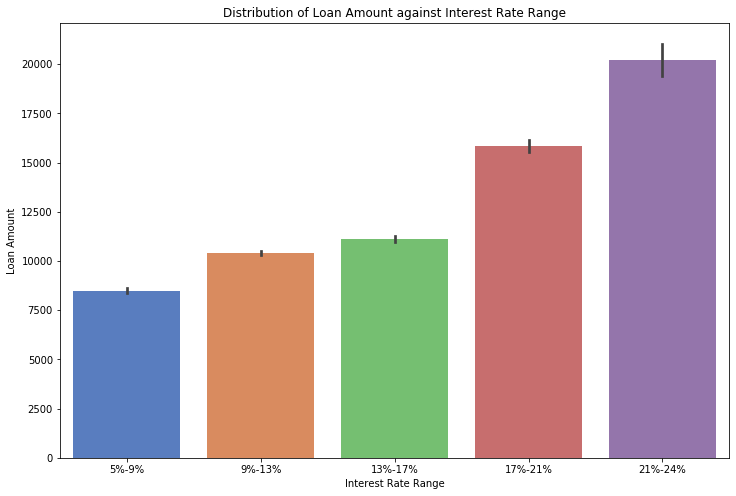

In [116]:
plt.figure(figsize=(12,8))
sns.barplot(data=loan_data,y='loan_amnt',x='int_rate_bins')
plt.ylabel('Loan Amount')
plt.xlabel('Interest Rate Range')
plt.title('Distribution of Loan Amount against Interest Rate Range')
plt.show()

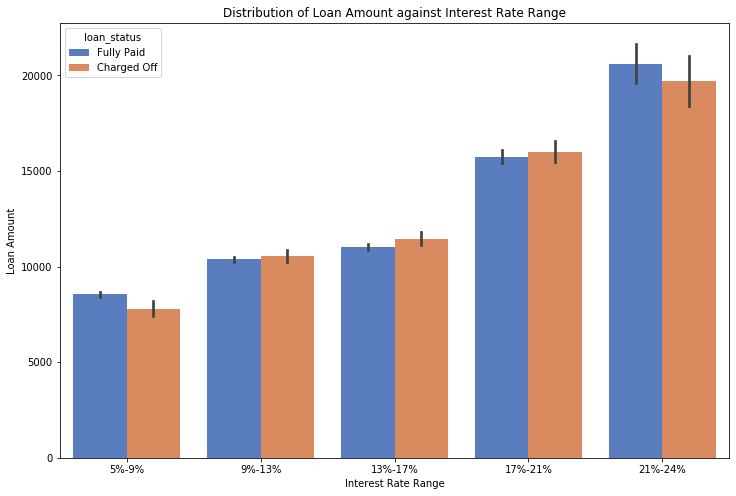

In [117]:
plt.figure(figsize=(12,8))
sns.barplot(data=loan_data,y='loan_amnt',x='int_rate_bins', hue='loan_status')
plt.ylabel('Loan Amount')
plt.xlabel('Interest Rate Range')
plt.title('Distribution of Loan Amount against Interest Rate Range')
plt.show()

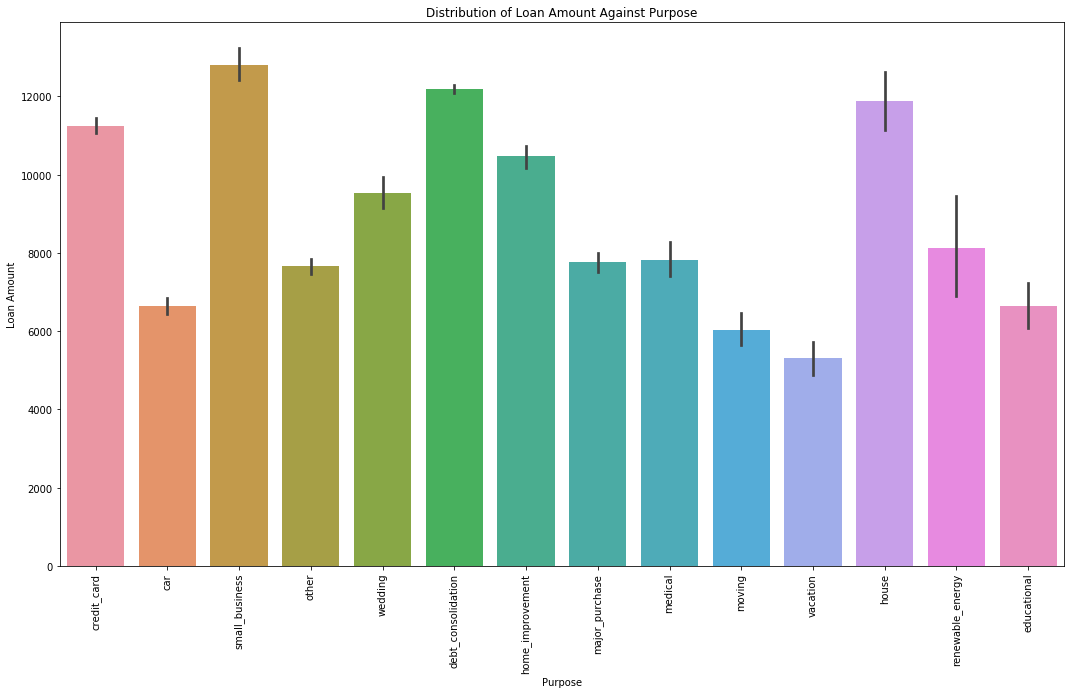

In [118]:
plt.figure(figsize=(18,10))
sns.barplot(data=loan_data,x='purpose',y='loan_amnt')
plt.xticks(rotation='vertical')
plt.xlabel('Purpose')
plt.ylabel('Loan Amount')
plt.title('Distribution of Loan Amount Against Purpose')
plt.show()

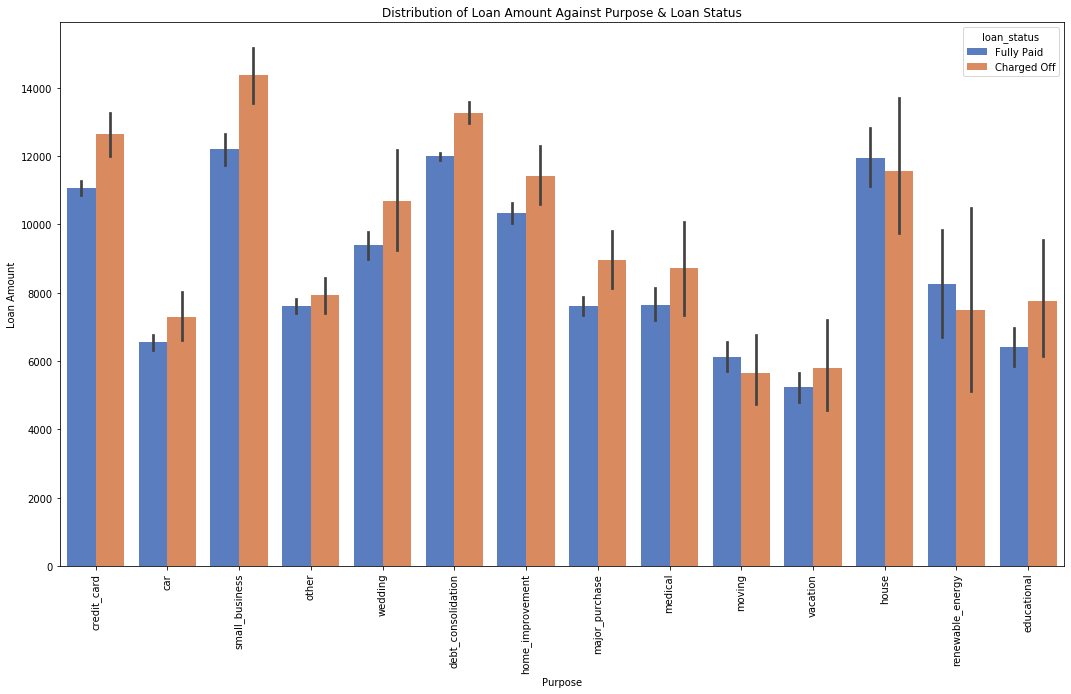

In [119]:
plt.figure(figsize=(18,10))
sns.barplot(data=loan_data,x='purpose',y='loan_amnt',hue='loan_status')
plt.xticks(rotation='vertical')
plt.xlabel('Purpose')
plt.ylabel('Loan Amount')
plt.title('Distribution of Loan Amount Against Purpose & Loan Status')
plt.show()

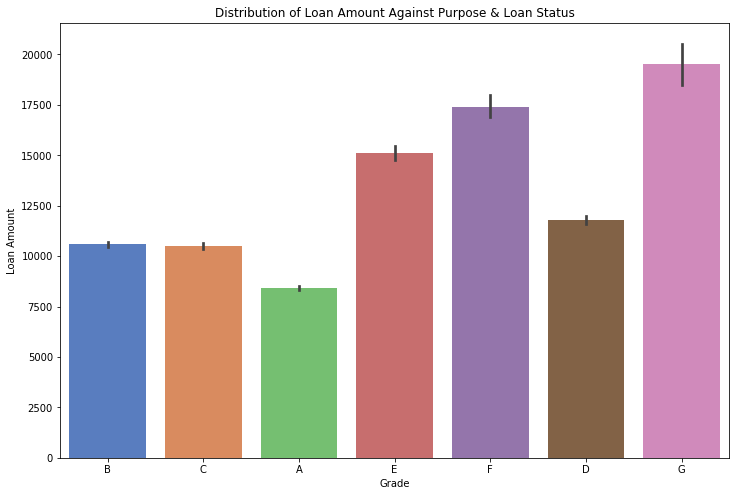

In [120]:
plt.figure(figsize=(12,8))
sns.barplot(data=loan_data,x='grade',y='loan_amnt')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.title('Distribution of Loan Amount Against Purpose & Loan Status')
plt.show()

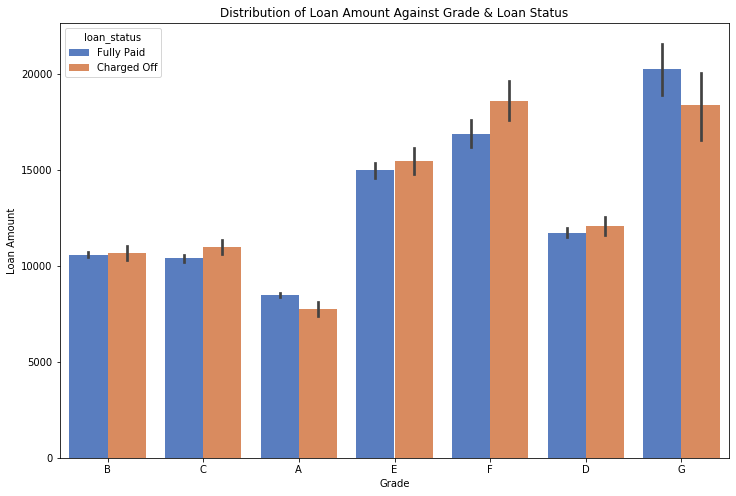

In [121]:
plt.figure(figsize=(12,8))
sns.barplot(data=loan_data,x='grade',y='loan_amnt',hue='loan_status')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.title('Distribution of Loan Amount Against Grade & Loan Status')
plt.show()

### Loan against House Ownership

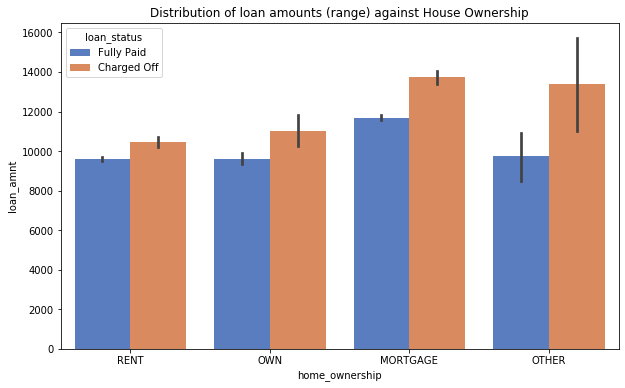

In [122]:
plt.figure(figsize=(10,6))
sns.barplot(data =loan_data,x='home_ownership', y='loan_amnt', hue ='loan_status')
plt.title("Distribution of loan amounts (range) against House Ownership")
plt.show()

### Loan against Employment Length

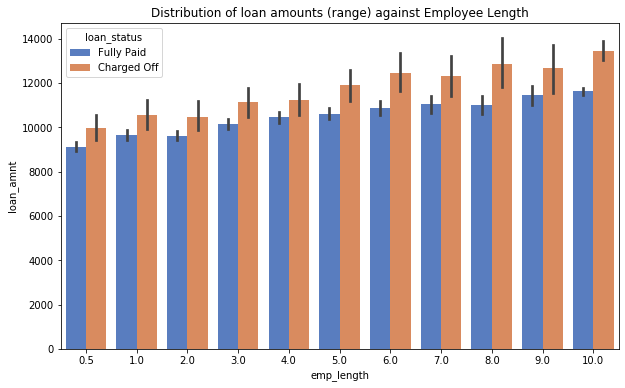

In [123]:
plt.figure(figsize=(10,6))
sns.barplot(data =loan_data,y='loan_amnt', x='emp_length', hue ='loan_status')
plt.title("Distribution of loan amounts (range) against Employee Length")
plt.show()

### Loan Amount against Interest rates

<Figure size 432x288 with 0 Axes>

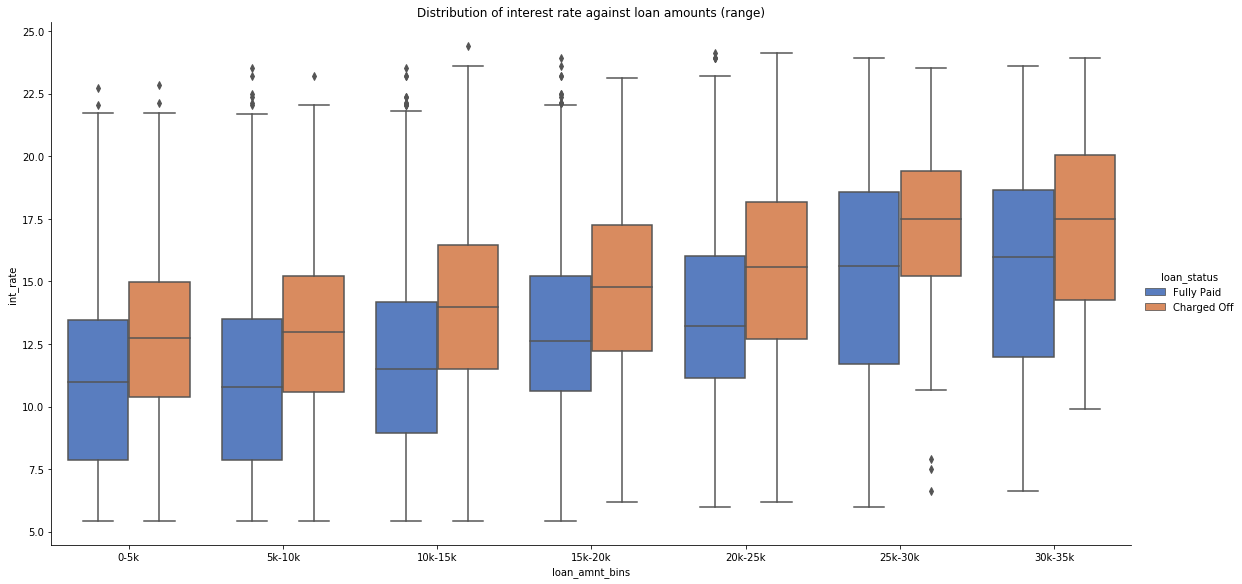

In [124]:
plt.tight_layout()
sns.catplot(data =loan_data,y ='int_rate', x ='loan_amnt_bins', hue ='loan_status',kind = 'box',height=8, aspect=2)
plt.title("Distribution of interest rate against loan amounts (range)")
plt.show()

<b>Observation: </b> 
- Interest rate for charged off loans is pretty high as compared to fully paid loans
- This can be a very strong factor for loan defaulting